In [38]:
#write out the algorithm, check that it works
from random import uniform
from math import sqrt
from time import time

#Define total number of darsts to throw - perhaps make this an input value
num_darts = 2000000
#Define a variable to store the number of darts that fall inside the circle
num_darts_circle = 0

#Record the time execution time of the loop that runs the actual situation
start_time = time()

#This loop simulates the dart throwing. For ea. dart find a random position in the unit square for it to fall
#Test if the location of the thrown dart is within the circle by calculating its distance from the center (0.5,0.5)
#Darts that are within 0.5 of the origin are within the circle.
for n in range(num_darts):
    x,y = uniform(0,1), uniform(0,1)
    if sqrt((x-0.5)**2+(y-0.5)**2) <= 0.5:
        num_darts_circle += 1

#record the time after the conclusion of the loop
end_time = time()
#The total time requiered to run the loop is the difference
execution_time = end_time - start_time

#Calc. the approx for Pi
# pi = 4 * Area
pi_approx = 4 * (num_darts_circle / float(num_darts))

print ("Pi Approximation:", pi_approx)
print ("Number of Darts:", num_darts)
print ("Execution Time (s):", execution_time)
print ("Darts Thrown per Second:", num_darts/execution_time)

Pi Approximation: 3.141234
Number of Darts: 2000000
Execution Time (s): 1.701366662979126
Darts Thrown per Second: 1175525.5604326709


# Four Different parallization methods tried below:

# 1 - simple/threading
# 2 - multiprocessor/pooling
# 3 - concurrent futures
# 4 - ipyparallel

# . . .
# #1 Semi-Simple Execution (Threading)

In [39]:
#Simple Threading Method - This will take time to run

from random import uniform
from math import sqrt
from time import time
import os
os.getpid()
import threading
import numpy as np
from queue import Queue

#initialize export variables
a = Queue()
b = Queue()
c = Queue()

#define the simulation in a threading method
def thrower(num):
    """Dart Throwing code"""
    #Define total number of darts to throw
    num_darts = num
    #Define a variable to store the number of darts that fall inside the circle
    num_darts_circle = 0

    #Record the time execution time of the loop that runs the actual situation
    start_time = time()

    #This loop simulates the dart throwing. For ea. dart find a random position in the unit square for it to fall
    #Test if the location of the thrown dart is within the circle by calculating its distance from the center (0.5,0.5)
    #Darts that are within 0.5 of the origin are within the circle.
    for n in range(num_darts):
        x,y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2+(y-0.5)**2) <= 0.5:
            num_darts_circle += 1

    #record the time after the conclusion of the loop
    end_time = time()
    #The total time requiered to run the loop is the difference
    execution_time = end_time - start_time

    #Calc. the approx for Pi
    # pi = 4 * Area
    pi_approx = 4 * (num_darts_circle / float(num_darts))
    darts_per_sec = num_darts/execution_time
    
    #output results
    a.put(darts_per_sec)
    b.put(execution_time)
    c.put(num_darts)
    return

threads = []
#creat the input values for the threads
trials = np.linspace(10**1,10**7,71)
vals=[]
for i in range(len(trials)):
    vals.append(int(trials[i]))

#call the threading function
for x,i in enumerate(vals):
    t = threading.Thread(target=thrower, args=(i,))
    threads.append(t)
    t.start()
    
#generate the output variables from the queue
sim_rate = list(a.queue)
Execution_time = list(b.queue)
Darts_thrown = list(c.queue)

# #2 Multiprocessing Using Pools

In [41]:
#Pooling w/multiprocessing
# some overhead to launch the pools may slow down calculation time

import time
import multiprocessing
from multiprocessing import Pool
from random import uniform
from math import sqrt
from time import time
import os
os.getpid()
import numpy as np

def thrower(num):
    """Dart Throwing code"""
    #Define total number of darts to throw
    num_darts = num
    #Define a variable to store the number of darts that fall inside the circle
    num_darts_circle = 0
    #Record the time execution time of the loop that runs the actual situation
    start_time = time()

    #This loop simulates the dart throwing. For ea. dart find a random position in the unit square for it to fall
    #Test if the location of the thrown dart is within the circle by calculating its distance from the center (0.5,0.5)
    #Darts that are within 0.5 of the origin are within the circle.
    for n in range(num_darts):
        x,y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2+(y-0.5)**2) <= 0.5:
            num_darts_circle += 1

    #record the time after the conclusion of the loop
    end_time = time()
    #The total time requiered to run the loop is the difference
    execution_time = end_time - start_time

    #Calc. the approx for Pi
    # pi = 4 * Area
    pi_approx = 4 * (num_darts_circle / float(num_darts))
    darts_per_sec = num_darts/execution_time
    
    return (num_darts, execution_time, darts_per_sec)

trials = np.linspace(10**1,10**7,71)
vals=[]
for i in range(len(trials)):
    vals.append(int(trials[i]))


pool = Pool(processes=8)  # start worker processes 
ress = pool.map(thrower,vals) #call the pool to execute the simulation function
pool.terminate() 
del pool

#parse results (list of tuples) likely not the most elegant way to do this...
pl_Darts_thrown=[]
pl_sim_rate=[]
pl_execution_time=[]
for i in range(len(ress)):
        pl_Darts_thrown.append(ress[i][0])
        pl_sim_rate.append(ress[i][2])
        pl_execution_time.append(ress[i][1])

# #3 concurrent.futures

In [42]:
#concurrent.futures
from concurrent.futures import ProcessPoolExecutor
e = ProcessPoolExecutor()

def thrower(num):
    """Dart Throwing code"""
    #Define total number of darts to throw
    num_darts = num
    #Define a variable to store the number of darts that fall inside the circle
    num_darts_circle = 0

    #Record the time execution time of the loop that runs the actual situation
    start_time = time()

    #This loop simulates the dart throwing. For ea. dart find a random position in the unit square for it to fall
    #Test if the location of the thrown dart is within the circle by calculating its distance from the center (0.5,0.5)
    #Darts that are within 0.5 of the origin are within the circle.
    for n in range(num_darts):
        x,y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2+(y-0.5)**2) <= 0.5:
            num_darts_circle += 1

    #record the time after the conclusion of the loop
    end_time = time()
    #The total time requiered to run the loop is the difference
    execution_time = end_time - start_time

    #Calc. the approx for Pi
    # pi = 4 * Area
    pi_approx = 4 * (num_darts_circle / float(num_darts))
    darts_per_sec = num_darts/execution_time
    
    return (num_darts, execution_time, darts_per_sec)


trials = np.linspace(10**1,10**7,71)
vals=[]
for i in range(len(trials)):
    vals.append(int(trials[i]))

future = e.submit(thrower,vals)
results = list(e.map(thrower, vals))

#parse results (list of tuples) likely not the most elegant way to do this...
f_Darts_thrown=[]
f_sim_rate=[]
f_execution_time=[]
for i in range(len(results)):
        f_Darts_thrown.append(results[i][0])
        f_sim_rate.append(results[i][2])
        f_execution_time.append(results[i][1])

e.shutdown()



# #4 pyparallel method




In [7]:
#cluster launched from notebook file
# DO NOT run this in this notebook - open 'cluster launcher' which contains the following lines...
# --> !ipython profile create mycluster --parallel
# --> !ipcluster start --profile=mycluster --n=4


In [47]:
#define the function to be called by the cluster

def thrower(num):
    from random import uniform
    from math import sqrt
    from time import time
    
    """Dart Throwing code"""
    #Define total number of darts to throw
    num_darts = num
    #Define a variable to store the number of darts that fall inside the circle
    num_darts_circle = 0

    #Record the time execution time of the loop that runs the actual situation
    start_time = time()

    #This loop simulates the dart throwing. For ea. dart find a random position in the unit square for it to fall
    #Test if the location of the thrown dart is within the circle by calculating its distance from the center (0.5,0.5)
    #Darts that are within 0.5 of the origin are within the circle.
    for n in range(num_darts):
        x,y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2+(y-0.5)**2) <= 0.5:
            num_darts_circle += 1

    #record the time after the conclusion of the loop
    end_time = time()
    #The total time requiered to run the loop is the difference
    execution_time = end_time - start_time

    #Calc. the approx for Pi
    # pi = 4 * Area
    pi_approx = 4 * (num_darts_circle / float(num_darts))
    darts_per_sec = num_darts/execution_time
    
    return (num_darts, execution_time, darts_per_sec)

In [43]:
#Connect this client to the launched cluster
import ipyparallel as ipp
c = ipp.Client(profile='mycluster')

In [44]:
#check if connected to cluster
c.ids

[0, 1, 2, 3]

In [45]:
#create a direct view object that will execute the calculations
dview = c[:] # use all engines

In [48]:
#Do the thing!!! (This will take some time...)
import numpy as np

trials = np.linspace(10**1,10**7,71) #create the input array
vals=[]
for i in range(len(trials)):
    vals.append(int(trials[i]))

parallel_result = dview.map_sync(thrower, vals)

In [49]:
#parse the parallel_results variable for plotting
#parse results (list of tuples) likely not the most elegant way to do this...
py_Darts_thrown=[]
py_sim_rate=[]
py_execution_time=[]
for i in range(len(parallel_result)):
        py_Darts_thrown.append(parallel_result[i][0])
        py_sim_rate.append(parallel_result[i][2])
        py_execution_time.append(parallel_result[i][1])


In [50]:
!ipcluster stop --profile=mycluster
#DO NOT REMOVE - Run this to close the runnning cluster

2018-03-04 21:36:03.855 [IPClusterStop] Stopping cluster [pid=2654] with [signal=<Signals.SIGINT: 2>]


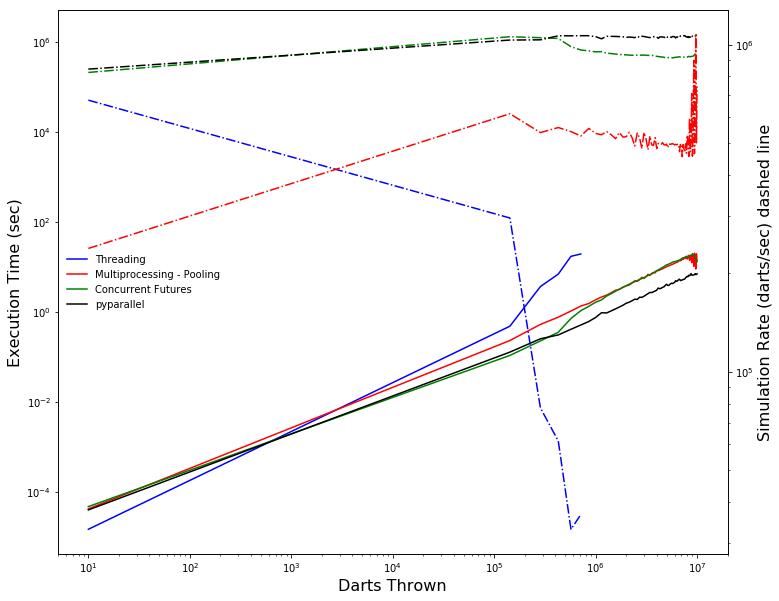

In [51]:
#plot results of the different parallelization methods
%matplotlib inline
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (12,10))

pt1 = ax.plot(Darts_thrown,Execution_time,'b',label = 'Simple / Threading')
pt2 = ax.plot(pl_Darts_thrown,pl_execution_time,'r',label = 'Multiprocessing - Pooling')
pt3 = ax.plot(f_Darts_thrown,f_execution_time,'g',label = 'Concurrent Futures')
pt4 = ax.plot(py_Darts_thrown,py_execution_time,'k',label = 'pyparallel')
ax.set_ylabel('Execution Time (sec)',fontsize = 16)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Darts Thrown',fontsize = 16)

ax2 = ax.twinx()
pt5 = ax2.plot(Darts_thrown,sim_rate,'b-.',label = 'Simple / Threading')
pt6 = ax2.plot(pl_Darts_thrown,pl_sim_rate,'r-.',label = 'Multiprocessing - Pooling')
pt7 = ax.plot(f_Darts_thrown,f_sim_rate,'g-.',label = 'Concurrent Futures')
pt8 = ax.plot(py_Darts_thrown,py_sim_rate,'k-.',label = 'pyparallel')
ax2.set_yscale('log')
ax2.set_ylabel('Simulation Rate (darts/sec) dashed line',fontsize = 16)

pt = pt1+pt2+pt3+pt4
pts = [l.get_label() for l in pt]
ax.legend(pt, pts, loc='center left',frameon = False)